In [11]:
from keras.datasets import mnist
# Sequential is waiting for list of layers
from keras.models import Sequential
# layers
# dense - Each neuron recieves input from all the neurons in the previous layer
# dropout - used to prevent a model from overfitting 
# flatten - to flatten the input (e.g: n * c * h * w -> n*(c*h*w))

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# to_categorical is changing 5 to [0,0,0,0,0,1,0,0,0,0]
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

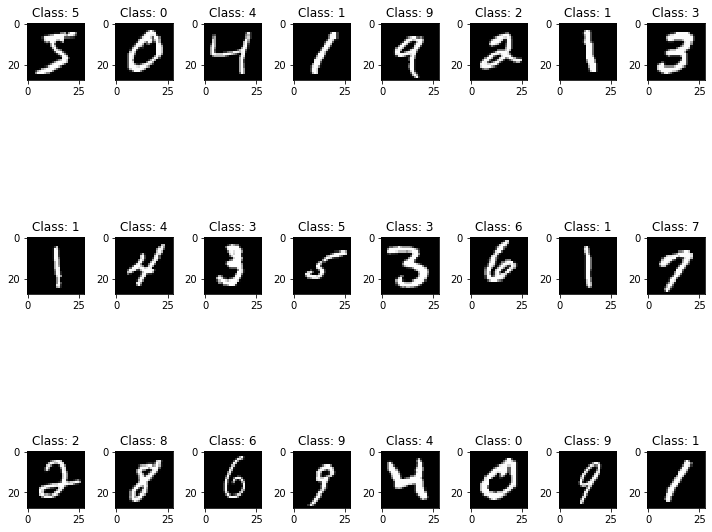

In [6]:
plt.figure(figsize=(10,10)) # bigger size of images

for idx in range(24):
    plt.subplot(3, 8, idx+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title('Class: {}'.format(y_train[idx]))

plt.tight_layout() #increase the space between images

In [7]:
X_train.shape # but we want to have the number of channels, and also normalize the value of color (instead 0->255, 0->1)

(60000, 28, 28)

In [8]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

# reshape(-1, ...) means do it yourself
X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

#( , ,1) - 1 is our number os chanells
input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
# normalizing the values
if np.max(X_train) > 1: X_train = X_train /255
if np.max(X_test) > 1: X_test = X_test /255

In [10]:
X_test.max(), X_train.max()

(1.0, 1.0)

In [12]:
# instead just the category e.g 5, we want the probability of each category ([0,0,0,0,0,1,0,0,0,0])
if len(y_train.shape) == 1: #to avoid overwritting when runs a few times
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)


In [13]:
y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [15]:
model = Sequential([
    # minimum one layer of Conv2D and MaxPool2D
    #filters=32 - we will have 32 images output
    #input_shape is required only one time
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape),
    #pool_size=(2,2) - is reducing image twice
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=64, kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),
    
    # to go through one kind of layers to another
    Flatten(),
    # 512 - numbers of neurons
    Dense(512, activation='relu'),
    # softmax - provides probabilities
    Dense(num_classes, activation='softmax')
    
])

# model.summary 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Training

In [16]:
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=3,
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 290s 5ms/step - loss: 0.1674 - acc: 0.9512 - val_loss: 0.0459 - val_acc: 0.9862
Epoch 2/3
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0464 - acc: 0.9856 - val_loss: 0.0336 - val_acc: 0.9891
Epoch 3/3
60000/60000 [==============================] - 279s 5ms/step - loss: 0.0294 - acc: 0.9906 - val_loss: 0.0341 - val_acc: 0.9874


# Testing

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)

In [18]:
# loss, accuracy
score

[0.03408197556098457, 0.9874]